# Initial exploration

### Exploration

- use revenue / budget ratio as the response variable? or including an interaction term with budget?
- sampling procedure?
- check if 'release_date' is being treated as a numeric variable
- 'out of time validation'? (if there is a significant trend over time)
- do cross validation -> metric? use relative error? (accounting for smaller revenue movies?); e.g. error = ((pred - actual)/actual)^2
- for performance comparison; pick a baseline? e.g. revenue = c*budget
- random forest (shap value?)
- number of characters in the title as a feature?
- including other dataset? stock market data (S&P500)?
- release date -> cyclical pattern? add months? holidays?

## Transforming variables

### Genres

### spoken languages

### Release date

Do we want to transform this variable as well?

This data does not have 'production companies', 'keywords', 'cast'. Do we want those?

Also we can do some kind of dimension reduction such as PCA for genres and languages columns.

### Linear Regression

### Output plots

It seems that overall linear trend is present, but more complex model might be more reasonbale here.

## Loading the data

In [1]:
from collections import Counter
import tmdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
pd.options.display.max_columns = 10
directors = pd.read_pickle('director.pkl')
top_directors = directors.loc[:, directors.sum(axis=0) >= 10]

In [4]:
dat = pd.read_pickle('movie_with_var.pkl')
cast_directors_pca = pd.read_pickle('pca.pkl')
dat = pd.concat([dat, cast_directors_pca, top_directors], axis=1)
dat.shape

(6147, 176)

# Revenue Prediction
## Train & Test set split & Prediction performance

Target: Revenue ($)

In [5]:
# sort with release_date
dat = dat.sort_values('release_date').reset_index()
dat['budget'] = dat.budget.astype(float)
dat['popularity'] = dat.popularity.astype(float)
dat['runtime'] = dat.runtime.astype(float)
dat['video'] = dat.video.astype(float)
dat['vote_average'] = dat.vote_average.astype(float)
dat['vote_count'] = dat.vote_count.astype(float)
dat['revenue'] = dat.revenue.astype(float)

dat = dat.loc[dat['revenue'] > 0] # removing movies without revenue record
dat.shape

(5547, 177)

In [6]:
train = dat.iloc[0:4800,:] # 1902-04-17 ~ 2017-09-22
test = dat.iloc[4800:,:]   # 2017-09-22 ~ 2023-10-25
test.head()

,index,budget,original_language,original_title,overview,...,Tony Scott,Walter Hill,Wes Anderson,Wes Craven,Woody Allen
5267,2645,25000000.0,en,Battle of the Sexes,The true story of the 1973 tennis match betwee...,...,0,0,0,0,0
5268,2060,30000000.0,en,Stronger,A victim of the Boston Marathon bombing in 201...,...,0,0,0,0,0
5269,1026,38000000.0,en,Only the Brave,Members of the Granite Mountain Hotshots battl...,...,0,0,0,0,0
5272,6013,6200000.0,en,Jeepers Creepers 3,Taking place on the last day of the Creeper’s ...,...,0,0,0,0,0
5273,5457,19000000.0,en,Flatliners,"Five medical students, hoping to understand th...",...,0,0,0,0,0


In [7]:
X_train = train.drop(['index', 'revenue', 'original_language', 'original_title', 'overview', 'production_countries', 'release_date', 'release_month', 'status',
                     'tagline', 'title', 'cast', 'directors', 'all_genres', 'production'], axis = 1)
y_train = train['revenue'] # /train['budget']
X_test = test.drop(['index', 'revenue', 'original_language', 'original_title', 'overview', 'production_countries', 'release_date', 'release_month', 'status',
                     'tagline', 'title', 'cast', 'directors', 'all_genres', 'production'], axis = 1)
y_test = test['revenue'] # /train['budget']

## XGBoost

### Time series K-fold CV (K=5)
* fold 1 : training [1], test [2]
* fold 2 : training [1 2], test [3]
* fold 3 : training [1 2 3], test [4]
* fold 4 : training [1 2 3 4], test [5]
* fold 5 : training [1 2 3 4 5], test [6]

## Parameter Tuning

## Final Fitting

### Variance Importance

### Example prediction

# Log Revenue Prediction
## Train & Test set split & Prediction performance

In [8]:
# dat['log_budget'] = np.log(dat['budget'] + 1)
dat['log_revenue'] = np.log(dat['revenue'] + 1)

train = dat.iloc[0:4800,:] # 1902-04-17 ~ 2017-09-22
test = dat.iloc[4800:,:]   # 2017-09-22 ~ 2023-10-25

X_train = train.drop(['index', 'revenue', 'log_revenue', 'original_language', 'original_title', 'overview', 'production_countries', 'release_date', 'release_month', 'status',
                     'tagline', 'title', 'cast', 'directors', 'all_genres', 'production'], axis = 1)
y_train = train['log_revenue'] # /train['budget']
X_test = test.drop(['index', 'revenue', 'log_revenue', 'original_language', 'original_title', 'overview', 'production_countries', 'release_date', 'release_month', 'status',
                     'tagline', 'title', 'cast', 'directors', 'all_genres', 'production'], axis = 1)
y_test = test['log_revenue'] # /train['budget']

In [9]:
train.tail()

,index,budget,original_language,original_title,overview,...,Walter Hill,Wes Anderson,Wes Craven,Woody Allen,log_revenue
5262,773,3000000.0,fr,L'Insulte,After an emotional exchange between a Lebanese...,...,0,0,0,0,13.816816
5263,2380,5741614.0,no,Thelma,A college student starts to experience extreme...,...,0,0,0,0,14.201900
5264,2101,104000000.0,en,Kingsman: The Golden Circle,When an attack on the Kingsman headquarters ta...,...,0,0,0,0,19.833867
5265,3465,70000000.0,en,The Lego Ninjago Movie,Six young ninjas are tasked with defending the...,...,0,0,0,0,18.628358
5266,1726,15000000.0,ru,Салют-7,"USSR, June 1985. After contact with the Salyut...",...,0,0,0,0,16.437788


## Parameter Tuning

In [10]:
from sklearn.model_selection import KFold
k = 5
random_seed = 2023
fold = list(KFold(k, shuffle = True, random_state = random_seed).split(X_train))
verbose = False

In [11]:
print(fold[0][0].shape)
print(fold[0][1].shape)

(3840,)
(960,)


In [12]:
import xgboost as xgb
from datetime import datetime
from sklearn.model_selection import ParameterGrid
param_grid = {'max_depth': [1, 3, 5, 10, 30, 100],
              'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
              'n_estimators': [500, 1000, 2000]}
grid = ParameterGrid(param_grid)
rmse_total = []
start = datetime.now()
for params in grid:
    
#     start = datetime.now()
    rmse = []
    for i, (train_index, val_index) in enumerate(fold):
        trn_X = X_train.iloc[train_index]
        trn_y = y_train.iloc[train_index]
        val_X = X_train.iloc[val_index]
        val_y = y_train.iloc[val_index]

        xgb_reg = xgb.XGBRegressor(
            colsample_bytree=0.7,
            n_estimators = params['n_estimators'],
            max_depth = params['max_depth'],
            learning_rate = params['learning_rate'],
            min_child_weight=1.5,
            reg_alpha=0.75,
            reg_lambda=0.45,
            subsample=0.8,
            early_stopping_rounds = 100
        )
        xgb_reg.fit(trn_X, trn_y, 
#                     early_stopping_rounds = 100,
                    eval_set=[(val_X, val_y)],
                   verbose = False)

        # rmse_k = np.sqrt(np.mean(((np.array(val_y) - xgb_reg.predict(val_X))/val_X['budget'])**2)) # relative to budget
        # -> this makes the prediction for high budget movies very bad
        rmse_k = np.sqrt(np.mean((np.array(val_y) - xgb_reg.predict(val_X))**2)) # rmse of log revenue
        rmse.append(rmse_k)
    
    rmse_total.append(np.mean(rmse))
    print("n_estimators: " + str(params['n_estimators']) + 
          ", max_depth: " + str(params['max_depth']) + 
          ", learning_rate: " + str(params['learning_rate']) + 
          ", rmse: " + str(np.mean(rmse)))
    print(str(int((datetime.now()-start).seconds/60))+ 'm elapsed...')
    print("------------------------------------------------------")

n_estimators: 500, max_depth: 1, learning_rate: 0.001, rmse: 10.376705404020166
0m elapsed...
------------------------------------------------------
n_estimators: 1000, max_depth: 1, learning_rate: 0.001, rmse: 6.401899848491789
0m elapsed...
------------------------------------------------------
n_estimators: 2000, max_depth: 1, learning_rate: 0.001, rmse: 2.6852552132190457
1m elapsed...
------------------------------------------------------
n_estimators: 500, max_depth: 3, learning_rate: 0.001, rmse: 10.362258267929224
1m elapsed...
------------------------------------------------------
n_estimators: 1000, max_depth: 3, learning_rate: 0.001, rmse: 6.3696129291904295
2m elapsed...
------------------------------------------------------
n_estimators: 2000, max_depth: 3, learning_rate: 0.001, rmse: 2.6079977888013888
3m elapsed...
------------------------------------------------------
n_estimators: 500, max_depth: 5, learning_rate: 0.001, rmse: 10.36167841810442
4m elapsed...
----------

n_estimators: 1000, max_depth: 1, learning_rate: 0.05, rmse: 1.1548881509725335
107m elapsed...
------------------------------------------------------
n_estimators: 2000, max_depth: 1, learning_rate: 0.05, rmse: 1.1516688794582959
107m elapsed...
------------------------------------------------------
n_estimators: 500, max_depth: 3, learning_rate: 0.05, rmse: 1.1263518091181228
108m elapsed...
------------------------------------------------------
n_estimators: 1000, max_depth: 3, learning_rate: 0.05, rmse: 1.123967959728546
108m elapsed...
------------------------------------------------------
n_estimators: 2000, max_depth: 3, learning_rate: 0.05, rmse: 1.123967959728546
109m elapsed...
------------------------------------------------------
n_estimators: 500, max_depth: 5, learning_rate: 0.05, rmse: 1.1143157904436773
109m elapsed...
------------------------------------------------------
n_estimators: 1000, max_depth: 5, learning_rate: 0.05, rmse: 1.114050929062118
110m elapsed...
---

In [13]:
grid[np.argmin(rmse_total)] # final hyperparameters

{'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.01}

## Final Fitting

In [14]:
# split final train and validation set
X_trn = X_train.iloc[0:4000,:]
y_trn = y_train.iloc[0:4000]
X_val = X_train.iloc[4000:,:]
y_val = y_train.iloc[4000:]

In [15]:
xgb_reg = xgb.XGBRegressor(
    colsample_bytree=0.7,
    n_estimators = grid[np.argmin(rmse_total)]['n_estimators'],
    max_depth = grid[np.argmin(rmse_total)]['max_depth'],
    learning_rate = grid[np.argmin(rmse_total)]['learning_rate'],
    min_child_weight=1.5,
    reg_alpha=0.75,
    reg_lambda=0.45,
    subsample=0.8,
    early_stopping_rounds = 100
    )

xgb_reg.fit(X_train, y_train, 
            eval_set=[(X_val, y_val)],
            verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [16]:
pred = xgb_reg.predict(X_test)
# print(np.sqrt(np.mean(((np.array(y_test) - xgb_reg.predict(X_test))/X_test['budget'])**2)))
print(np.sqrt(np.mean((np.array(y_test) - xgb_reg.predict(X_test))**2)))

1.3254634450527492


In [17]:
print(np.sqrt(np.mean((np.array(y_test) - np.log(X_test['budget']+1))**2)))

1.655217393229664


### Variance Importance

<Axes: >

/Users/hyoinan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  func(*args, **kwargs)
/Users/hyoinan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
/Users/hyoinan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  func(*args, **kwargs)
/Users/hyoinan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  func(*args, **kwargs)
/Users/hyoinan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  func(*args, **kwargs)
/Users/hyoinan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/e

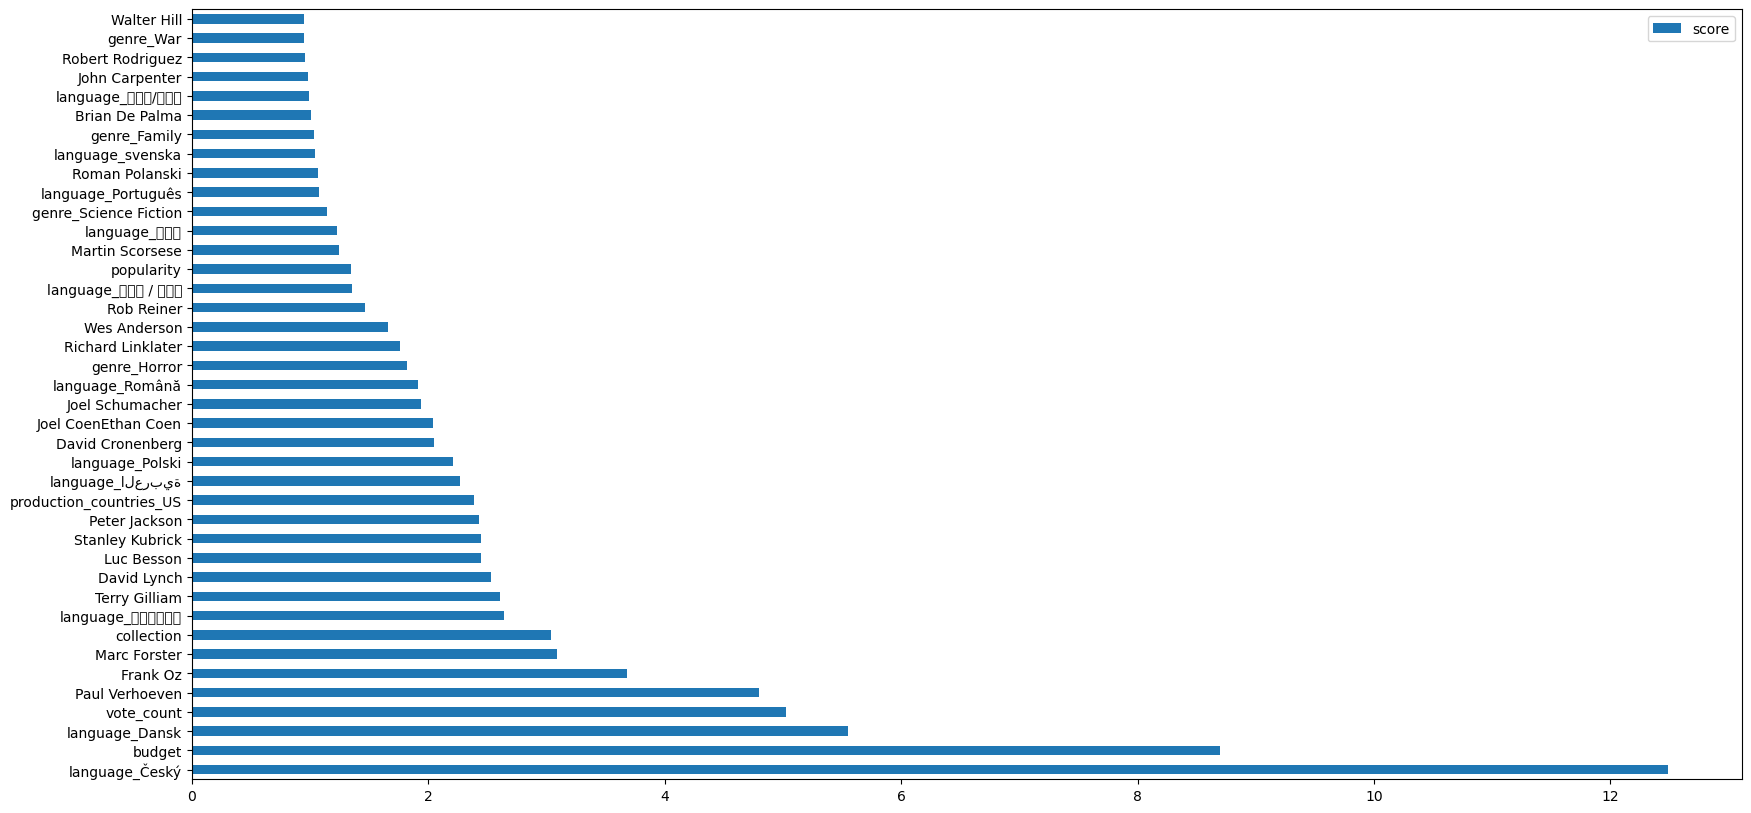

In [18]:
feature_important = xgb_reg.get_booster().get_score(importance_type="gain")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

### Example prediction

In [19]:
pd.options.display.max_rows = 100
pd.DataFrame(np.column_stack((X_test['budget'], y_test, pred, y_test-pred)), columns = ['budget', 'log_Actual', 'Predicted', 'Difference'])

,budget,log_Actual,Predicted,Difference
0,25000000.0,16.352260,17.391083,-1.038822
1,30000000.0,15.953742,17.256031,-1.302289
2,38000000.0,17.064131,17.093098,-0.028967
3,6200000.0,15.206258,14.170592,1.035666
4,19000000.0,17.625684,17.085211,0.540473
...,...,...,...,...
742,80000000.0,18.440483,16.261957,2.178526
743,80000000.0,18.440483,16.261957,2.178526
744,30000000.0,18.696037,16.288931,2.407106
745,30000000.0,18.696037,16.288931,2.407106


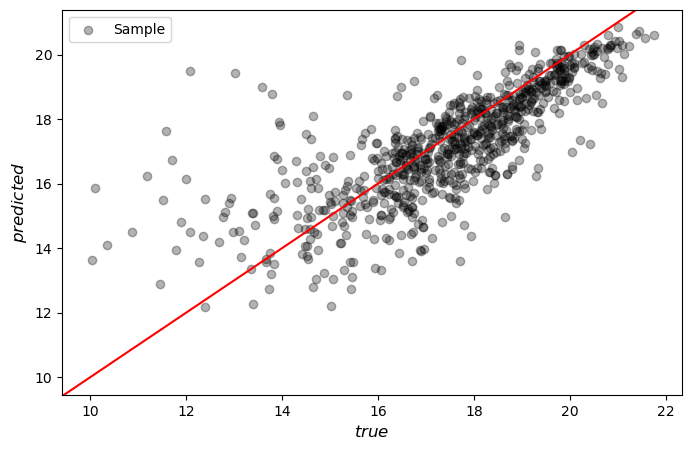

In [20]:
plt.figure(figsize=(8,5))

plt.scatter(y_test, 
            pred, 
            alpha=.3,
            label="Sample", color='black')
plt.legend(fontsize=10)
plt.xlabel("$true$", fontsize=12)
plt.ylabel("$predicted$", fontsize=12)
plt.axline([10, 10], [20, 20], color='red')
plt.show()

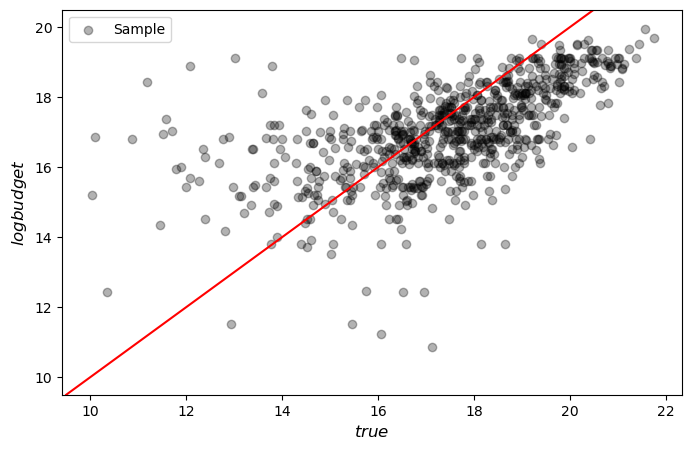

In [21]:
plt.figure(figsize=(8,5))

plt.scatter(y_test, 
            np.log(test['budget']+1), 
            alpha=.3,
            label="Sample", color='black')
plt.legend(fontsize=10)
plt.xlabel("$true$", fontsize=12)
plt.ylabel("$log budget$", fontsize=12)
plt.axline([10, 10], [20, 20], color='red')
plt.show()

In [22]:
test = test.reset_index(drop=True)
X_test = test.drop(['index', 'revenue', 'log_revenue', 'original_language', 'original_title', 'overview', 'production_countries', 'release_date', 'release_month', 'status',
                     'tagline', 'title', 'cast', 'directors', 'all_genres', 'production'], axis = 1)
y_test = test['log_revenue'] # /train['budget']

In [23]:
pd.options.display.max_rows = 8
result = pd.DataFrame(np.column_stack((np.exp(y_test)-1, np.round(np.exp(pred)-1), np.exp(y_test)-np.exp(pred))), columns = ['Actual', 'Predicted', 'Difference'])
result = pd.concat([test, result], axis = 1)

In [24]:
pd.options.display.max_rows = None
result_summary = result[['original_title', 'budget', 'Actual', 'Predicted', 'Difference']]

In [25]:
result_summary.sort_values(['Difference']).tail()

,original_title,budget,Actual,Predicted,Difference
698,The Super Mario Bros. Movie,100000000.0,1.355725e+09,3.099418e+08,1.045783e+09
110,Avengers: Infinity War,300000000.0,2.052415e+09,1.006520e+09,1.045895e+09
724,Barbie,145000000.0,1.441700e+09,2.417658e+08,1.199934e+09
674,Avatar: The Way of Water,460000000.0,2.320250e+09,8.025260e+08,1.517724e+09
280,Avengers: Endgame,356000000.0,2.800000e+09,8.968430e+08,1.903157e+09


In [26]:
result_summary.Difference.abs()

0      2.307652e+07
1      2.271878e+07
2      7.569500e+05
3      2.591556e+06
4      1.885480e+07
5      1.068007e+08
6      9.821217e+05
7      1.859456e+08
8      5.044360e+07
9      4.867627e+06
10     1.046740e+08
11     5.952760e+07
12     2.183077e+07
13     4.764068e+06
14     3.782004e+06
15     1.569594e+07
16     5.604496e+06
17     1.008571e+07
18     5.494957e+07
19     9.443321e+07
20     5.239407e+06
21     2.238316e+06
22     2.608793e+07
23     7.956405e+06
24     3.452444e+06
25     2.960967e+07
26     6.100943e+06
27     1.844492e+07
28     3.135948e+08
29     6.047701e+06
30     1.148354e+06
31     8.913807e+07
32     2.595300e+07
33     4.172719e+05
34     1.431188e+08
35     5.219788e+07
36     8.378896e+06
37     1.767370e+08
38     2.663674e+08
39     4.100573e+06
40     6.184459e+07
41     8.665152e+07
42     8.910210e+07
43     1.049572e+07
44     4.834412e+06
45     1.120523e+07
46     5.429161e+08
47     1.116676e+08
48     1.997223e+08
49     1.365049e+08


In [28]:
# result_summary = result_summary.drop('Abs_Difference', axis=1)
result_summary.insert(5, 'Abs_Difference', result_summary.Difference.abs())

In [29]:
result_summary.sort_values('Abs_Difference')

,original_title,budget,Actual,Predicted,Difference,Abs_Difference
303,Portrait de la jeune fille en feu,5740000.0,9.923127e+06,9.920340e+06,2.787000e+03,2.787000e+03
72,Braven,5000000.0,8.543190e+05,8.483850e+05,5.933563e+03,5.933563e+03
600,Speak No Evil,3000000.0,6.234620e+05,6.350090e+05,-1.154694e+04,1.154694e+04
592,Blacklight,43000000.0,1.590221e+07,1.588953e+07,1.267700e+04,1.267700e+04
461,The Wolf of Snow Hollow,2000000.0,2.398280e+05,1.918650e+05,4.796316e+04,4.796316e+04
183,High Life,8933400.0,2.133033e+06,2.196018e+06,-6.298475e+04,6.298475e+04
123,Action Point,19000000.0,5.059608e+06,5.127600e+06,-6.799250e+04,6.799250e+04
433,Capone,20600000.0,8.582810e+05,7.780860e+05,8.019450e+04,8.019450e+04
148,The Darkest Minds,34000000.0,4.114238e+07,4.124356e+07,-1.011800e+05,1.011800e+05
513,Werewolves Within,6500000.0,9.374900e+05,1.047456e+06,-1.099656e+05,1.099656e+05


In [30]:
result['release_date'] = pd.to_datetime(result['release_date'])

<Axes: title={'center': 'Difference'}, xlabel='[Year]'>

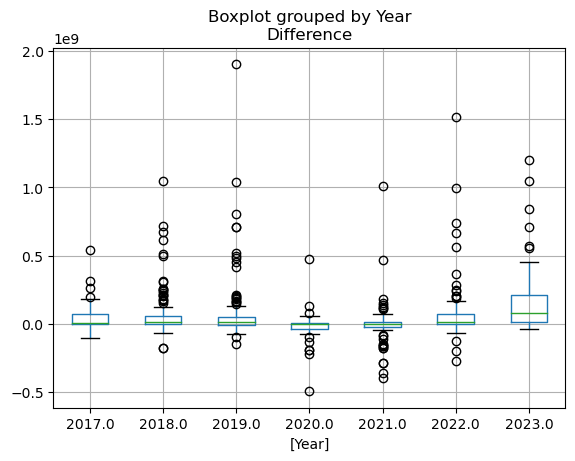

In [31]:
df = pd.DataFrame(np.column_stack((result['release_date'].dt.year, result['Difference'])), columns = ['Year', 'Difference'])
df.boxplot(by='Year')

<Axes: title={'center': 'Difference'}, xlabel='[Year]'>

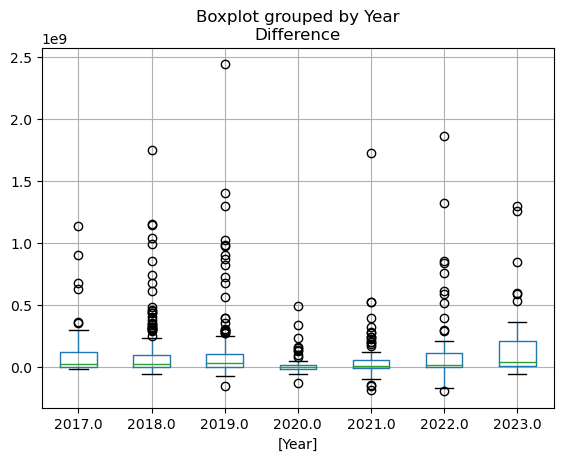

In [32]:
df = pd.DataFrame(np.column_stack((result['release_date'].dt.year, result['Actual']-result['budget'])), columns = ['Year', 'Difference'])
df.boxplot(by='Year')

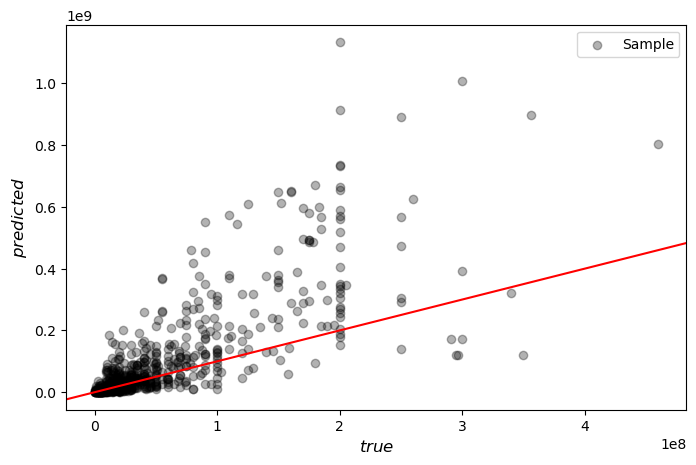

In [33]:
plt.figure(figsize=(8,5))

plt.scatter(test['budget'], 
            np.round(np.exp(pred)+1), 
            alpha=.3,
            label="Sample", color='black')
plt.legend(fontsize=10)
plt.xlabel("$true$", fontsize=12)
plt.ylabel("$predicted$", fontsize=12)
plt.axline([10, 10], [20, 20], color='red')
plt.show()

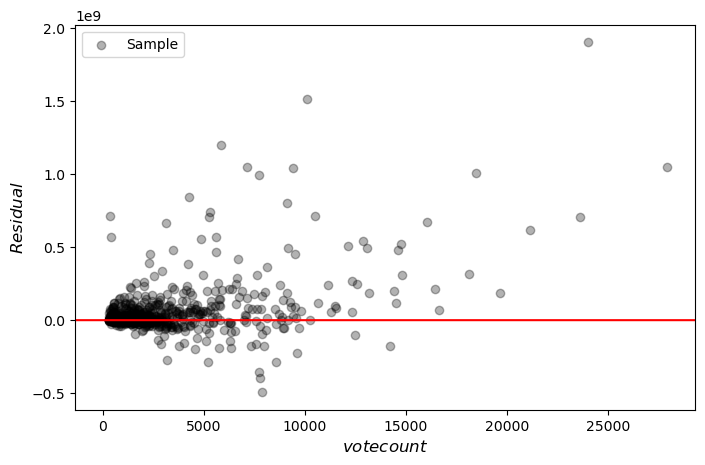

In [34]:
plt.figure(figsize=(8,5))

plt.scatter(result['vote_count'], 
            result['Difference'], 
            alpha=.3,
            label="Sample", color='black')
plt.legend(fontsize=10)
plt.xlabel("$vote count$", fontsize=12)
plt.ylabel("$Residual$", fontsize=12)
plt.axline([10, 10], [20, 20], color='red')
plt.show()

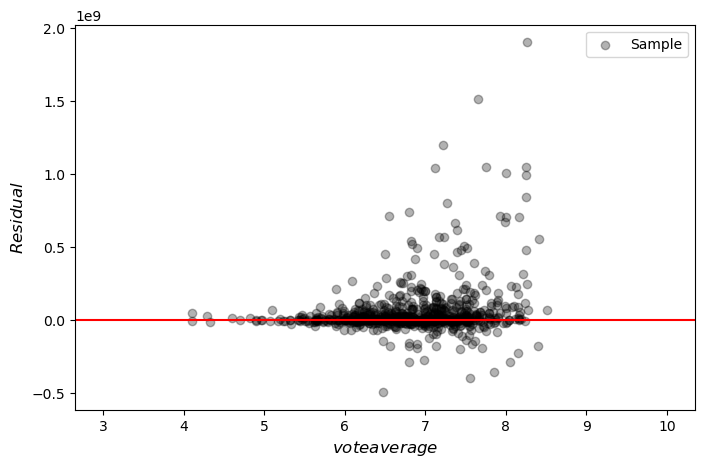

In [35]:
plt.figure(figsize=(8,5))

plt.scatter(result['vote_average'], 
            result['Difference'], 
            alpha=.3,
            label="Sample", color='black')
plt.legend(fontsize=10)
plt.xlabel("$vote average$", fontsize=12)
plt.ylabel("$Residual$", fontsize=12)
plt.axline([3, 3], [10, 10], color='red')
plt.show()

In [ ]:
# from sklearn.model_selection import ParameterGrid
# param_grid = {'max_depth': [1, 3, 5, 10, 30, 50], 
#               'max_leaves': [10, 20, 30],
#               'learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2],
#               'n_estimators': [100, 300, 500]}
# grid = ParameterGrid(param_grid)
# rmse_total = []
# start = datetime.now()
# for params in grid:
    
# #     start = datetime.now()
#     rmse = []
#     for i, (train_index, val_index) in enumerate(tscv.split(X_train)):
#         trn_X = X_train.iloc[train_index]
#         trn_y = y_train.iloc[train_index]
#         val_X = X_train.iloc[val_index]
#         val_y = y_train.iloc[val_index]

#         xgb_reg = xgb.XGBRegressor(
#             n_estimators = params['n_estimators'],
#             max_depth = params['max_depth'],
#             max_leaves = params['max_leaves'],
#             learning_rate = params['learning_rate'],
#             early_stopping_rounds = 100
#         )
#         xgb_reg.fit(trn_X, trn_y, 
# #                     early_stopping_rounds = 100,
#                     eval_set=[(val_X, val_y)],
#                    verbose = False)

#         # rmse_k = np.sqrt(np.mean(((np.array(val_y) - xgb_reg.predict(val_X))/val_X['budget'])**2)) # relative to budget
#         # -> this makes the prediction for high budget movies very bad
#         rmse_k = np.sqrt(np.mean((np.array(val_y) - xgb_reg.predict(val_X))**2)) # rmse of log revenue
#         rmse.append(rmse_k)
    
#     rmse_total.append(np.mean(rmse))
#     print("n_estimators: " + str(params['n_estimators']) + 
#           "max_depth: " + str(params['max_depth']) + 
#           ", max_leaves: " + str(params['max_leaves']) +
#           ", learning_rate: " + str(params['learning_rate']) + 
#           ", rmse: " + str(np.mean(rmse)))
#     print(str(int((datetime.now()-start).seconds/60))+ 'm elapsed...')
#     print("------------------------------------------------------")

In [ ]:
# import xgboost as xgb

# def xgb_model(trn_x, trn_y, val_x, val_y, verbose) :
    

    
#     record = dict()
#     model = xgb.train(params
#                       , xgb.DMatrix(trn_x, trn_y)
#                       , 100000
#                       , [(xgb.DMatrix(trn_x, trn_y), 'train'), (xgb.DMatrix(val_x, val_y), 'valid')]
#                       , verbose_eval=verbose
#                       , early_stopping_rounds=500)
    
#     # validation - calcuating relative rmse
#     val_pred = model.predict(xgb.DMatrix(val_x), ntree_limit=model.best_ntree_limit)
#     rmse = np.sqrt(np.mean(((val_pred - val_y)/val_x['budget'])^2))
    
    
#     best_idx = np.argmin(np.array(record['valid']['rmse']))


#     return {'val':val_pred, 'error':record['valid']['rmse'][best_idx], 'importance':[i for k, i in model.get_score().items()]}

In [ ]:
# verbose = False
# random_seed = 2023
# for i, (train_index, val_index) in enumerate(tscv.split(X_train)):
#     trn_X = X_train.iloc[train_index]
#     trn_y = y_train.iloc[train_index]
#     val_X = X_train.iloc[val_index]
#     val_y = y_train.iloc[val_index]
    
#     start = datetime.now()
#     result = xgb_model(trn_X, trn_y, val_X, val_y, verbose)
#     fold_val_pred.append(result['val'])
#     fold_err.append(result['error'])
#     print("xgb model.", "{0:.5f}".format(result['error']), '(' + str(int((datetime.now()-start).seconds/60)) + 'm)')

In [ ]:
# from sklearn.model_selection import KFold
# k = 5
# random_seed = 2023
# fold = list(KFold(k, shuffle = True, random_state = random_seed).split(X_train))

# verbose = False
# for i, (trn, val) in enumerate(fold):
#     print(i+1, "fold.    RMSE")
    
#     X_tt = X_train.iloc[trn]
#     y_tt = y_train.iloc[trn]
#     X_val = X_train.iloc[val]
#     y_val = y_train.iloc[val]
    
#     fold_val_pred = []
#     fold_err = []
    
#     start = datetime.now()
#     result = xgb_model(X_tt, y_tt, X_val, y_val, verbose)
    
#     fold_val_pred.append(result['val'])
#     fold_err.append(result['error'])
    
#     print("xgb model.", "{0:.5f}".format(result['error']), '(' + str(int((datetime.now()-start).seconds/60)) + 'm)')